# Pràctica 2- Efecte de les característiques de les pel·lícules a la seva durada

### Taula de continguts

* [Neteja de les dades](#neteja_de_les_dades)
    * [Selecció dades interès](#selecció_dades_interès)
    * [Identificació zeros i elements buits](#identificació_zeros_i_elements_buits)
    * [Identificació valors extrems](#identificació_valors_extrems)
    * [Identificació valors sentinella](#identificació_valors_sentinella)
    * [Transformació de variables](#transformació_de_variables)
        * [Country](#country)
        * [Language](#language)
        * [Year](#year)
        * [Genres](#genres)
    * [One-hot encoding variables categòriques](#one_hot_encoding_variables_categòriques)
    * [Exportació dades processades](#exportació_dades_processades) 
    
* [Anàlisi de dades i proves estadístiques](#anàlisi_de_dades)
    * [Comprovació normalitat i homogeneïtat de la variància](#comprovació_normalitat_i_homogeneïtat_de_la_variància)
    * [Correlació variables amb la variable duració](#correlació_variables)
    * [Regressió lineal](#regressió_lineal)


In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.impute import KNNImputer
import operator
from scipy.stats.stats import pearsonr
from scipy.stats import mannwhitneyu
from statsmodels.graphics.gofplots import qqplot
import statsmodels.api as sm

### Neteja de les dades <a class="anchor" id="neteja_de_les_dades"></a>

In [2]:
# Load movie dataframe

df = pd.read_excel('movie.xlsx', skiprows=[0])

In [3]:
# Overview dataframe

df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [4]:
df.dtypes

color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

#### Selecció dades interès <a class="anchor" id="selecció_dades_interès"></a>

In [5]:
keep = ['color', 'num_critic_for_reviews', 'duration', 'director_facebook_likes', 
        'actor_3_facebook_likes', 'actor_2_facebook_likes', 'actor_1_facebook_likes', 'gross', 'genres',
        'num_voted_users', 'cast_total_facebook_likes', 'num_user_for_reviews', 'language', 'country',
        'budget', 'title_year', 'imdb_score', 'aspect_ratio', 'movie_facebook_likes']

filtered_df = df[keep]

#### Identificació zeros i elements buits <a class="anchor" id="identificació_zeros_i_elements_buits"></a>

In [6]:
# Sum of NaN

for l in filtered_df.columns:
    count = filtered_df[l].isna().sum()
    print (l, count)

color 19
num_critic_for_reviews 50
duration 15
director_facebook_likes 104
actor_3_facebook_likes 23
actor_2_facebook_likes 13
actor_1_facebook_likes 7
gross 884
genres 0
num_voted_users 0
cast_total_facebook_likes 0
num_user_for_reviews 21
language 12
country 5
budget 492
title_year 108
imdb_score 0
aspect_ratio 329
movie_facebook_likes 0


In [7]:
# remove NA from director_name, genres, language, country, color

remove_cols = ['genres', 'language', 'country', 'color','title_year']
for r in remove_cols:
    filtered_df = filtered_df[filtered_df[r].notna()]

for l in filtered_df.columns:
    count = filtered_df[l].isna().sum()
    print (l, count)
    
print (np.shape(filtered_df))

color 0
num_critic_for_reviews 40
duration 12
director_facebook_likes 0
actor_3_facebook_likes 18
actor_2_facebook_likes 10
actor_1_facebook_likes 7
gross 762
genres 0
num_voted_users 0
cast_total_facebook_likes 0
num_user_for_reviews 15
language 0
country 0
budget 391
title_year 0
imdb_score 0
aspect_ratio 297
movie_facebook_likes 0
(4913, 19)


In [8]:
# manage missing numerical values

num_cols = ['num_critic_for_reviews', 'duration', 'actor_3_facebook_likes', 'actor_2_facebook_likes', 
           'actor_1_facebook_likes', 'gross', 'num_user_for_reviews', 'budget', 'aspect_ratio']

imputer_KNN = KNNImputer(missing_values=np.nan, n_neighbors=3, weights="uniform", metric="nan_euclidean")

for c in num_cols:
    filtered_df[c] = imputer_KNN.fit_transform(filtered_df[c].values.reshape(-1, 1))

for l in filtered_df.columns:
    count = filtered_df[l].isna().sum()
    print (l, count)
    
print (np.shape(filtered_df))

color 0
num_critic_for_reviews 0
duration 0
director_facebook_likes 0
actor_3_facebook_likes 0
actor_2_facebook_likes 0
actor_1_facebook_likes 0
gross 0
genres 0
num_voted_users 0
cast_total_facebook_likes 0
num_user_for_reviews 0
language 0
country 0
budget 0
title_year 0
imdb_score 0
aspect_ratio 0
movie_facebook_likes 0
(4913, 19)


#### Identificació valors extrems <a class="anchor" id="identificació_valors_extrems"></a>

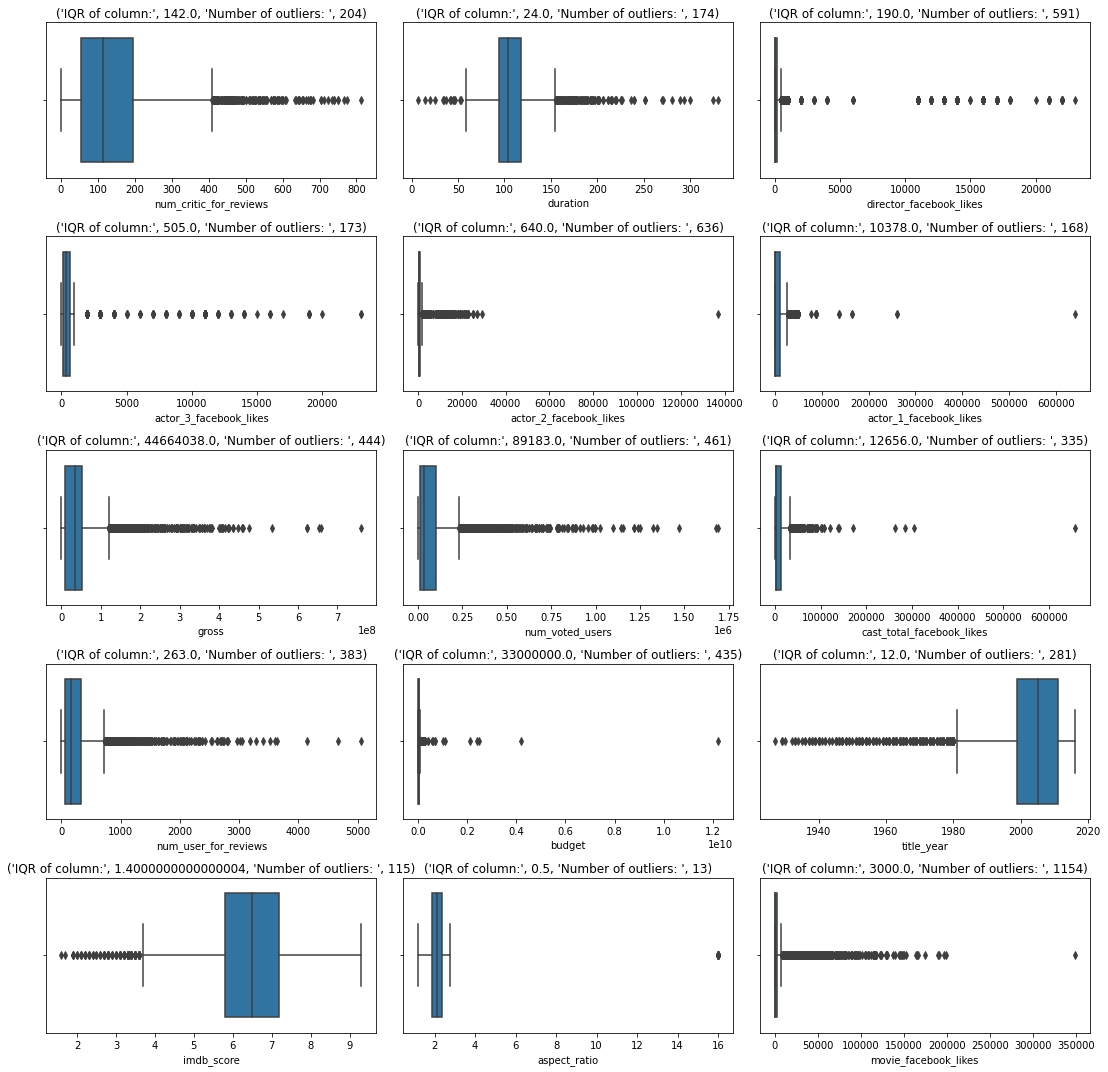

In [9]:
select_num = filtered_df.select_dtypes(include=['float64', 'int64'])
colnames = list(select_num.columns)

fig, axes = plt.subplots(nrows = int(np.shape(select_num)[1]/3), ncols = 3, figsize=(15,15))
y = 0
for name in colnames:
    i, j = divmod(y, 3)
    sns.boxplot(x=filtered_df[name], ax=axes[i, j])
    Q1 = filtered_df[name].quantile(0.25)
    Q3 = filtered_df[name].quantile(0.75)
    IQR = Q3 - Q1
    
    outliers_lower = filtered_df[name] < (Q1 - 1.5 * IQR)
    outlier_higher = filtered_df[name] > (Q3 + 1.5 * IQR)
    title = 'IQR of column:', IQR, 'Number of outliers: ',sum(outliers_lower) + sum(outlier_higher)
    axes[i,j].set_title(title)

    y = y + 1

plt.tight_layout()
plt.show()

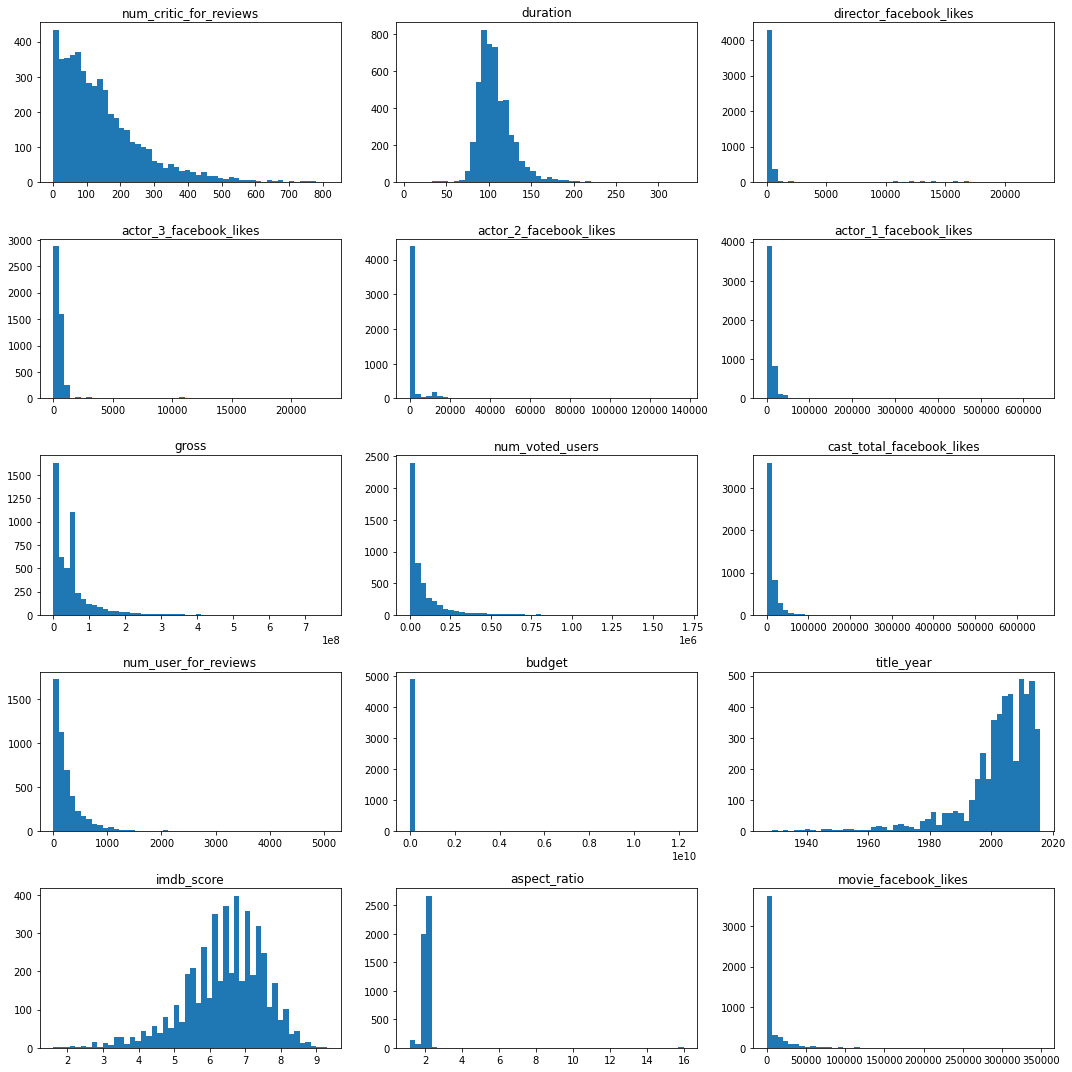

In [10]:
select_num = filtered_df.select_dtypes(include=['float64', 'int64'])
colnames = list(select_num.columns)

fig, axes = plt.subplots(nrows = int(np.shape(select_num)[1]/3), ncols = 3, figsize=(15,15))
y = 0
for name in colnames:
    i, j = divmod(y, 3)
    axes[i,j].hist(filtered_df[name], bins=50)
    axes[i,j].set_title(name)
    y += 1
    
plt.tight_layout()
plt.show()

#### Transformació de variables <a class="anchor" id="transformació_de_variables"></a>

##### 1.Country <a class="anchor" id="country"></a>

In [11]:
filtered_df['country'].unique()

array(['USA', 'UK', 'New Zealand', 'Canada', 'Australia', 'Belgium',
       'Japan', 'Germany', 'China', 'France', 'New Line', 'Mexico',
       'Spain', 'Hong Kong', 'Czech Republic', 'India', 'Soviet Union',
       'South Korea', 'Peru', 'Italy', 'Russia', 'Aruba', 'Denmark',
       'Libya', 'Ireland', 'South Africa', 'Switzerland', 'Romania',
       'West Germany', 'Chile', 'Netherlands', 'Hungary', 'Panama',
       'Greece', 'Sweden', 'Taiwan', 'Official site', 'Cambodia',
       'Thailand', 'Slovakia', 'Bulgaria', 'Iran', 'Georgia', 'Iceland',
       'Norway', 'Turkey', 'Nigeria', 'Brazil', 'Finland', 'Bahamas',
       'Argentina', 'Colombia', 'Poland', 'Israel', 'Egypt', 'Kyrgyzstan',
       'Indonesia', 'Pakistan', 'Slovenia', 'Afghanistan',
       'Dominican Republic', 'Cameroon', 'United Arab Emirates', 'Kenya',
       'Philippines'], dtype=object)

In [12]:
Africa = ('Kenya','Nigeria','Cameroon','Egypt','Libya','South Africa')
Asia = ('United Arab Emirates','Pakistan','Cambodia','Philippines','Afghanistan','Indonesia','Israel','Iran','China','Japan','Hong Kong','India','South Korea','Taiwan','Thailand','Kyrgyzstan')
Europe =('Slovenia','Turkey','Switzerland','Poland','Iceland','Finland',  'Sweden','Georgia', 'Norway','Slovakia', 'Bulgaria','Greece','Russia', 'Netherlands', 'Hungary','Romania', 'West Germany','Ireland','UK','Belgium','Germany','France','Spain','Czech Republic','Soviet Union','Italy','Denmark','Aruba',) 
America =('USA','Dominican Republic','Argentina', 'Colombia','Bahamas','Brazil','USA','Canada','Mexico','Peru','Chile','Panama') 
Oceania =('New Zealand','Australia')

def GetConti(country):
    if country in Africa:
        return "Africa"
    elif country in Asia:
        return "Asia"
    elif country in Europe:
        return "Europe"
    elif country in America:
        return "America"
    elif country in Oceania:
        return "Oceania"
    else:
        return "Other-continent"

filtered_df['Continent']=filtered_df['country'].apply(GetConti)
filtered_df=filtered_df.drop(['country'], axis=1)
filtered_df['Continent'].value_counts()

America            3872
Europe              821
Asia                137
Oceania              68
Africa               13
Other-continent       2
Name: Continent, dtype: int64

In [13]:
filtered_df[filtered_df['Continent']=="Other-continent"]

,color,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_facebook_likes,actor_1_facebook_likes,gross,genres,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,language,budget,title_year,imdb_score,aspect_ratio,movie_facebook_likes,Continent
281,Color,62.0,104.0,23.0,591.0,631.0,752.0,6712451.0,Comedy|Romance,4102,3133,89.0,English,90000000.0,2001.0,4.4,1.85,53,Other-continent
2675,Color,135.0,117.0,19.0,461.0,646.0,3000.0,20218921.0,Drama|Music,14814,4204,114.0,English,15000000.0,2010.0,6.3,2.35,0,Other-continent


##### 2. Language <a class="anchor" id="language"></a>

In [14]:
filtered_df['language'].value_counts()

English       4595
French          72
Spanish         40
Hindi           28
Mandarin        25
German          19
Japanese        17
Cantonese       11
Russian         11
Italian         10
Korean           8
Portuguese       8
Arabic           5
Danish           5
Hebrew           5
Persian          4
Swedish          4
Dutch            4
Norwegian        4
Thai             3
Chinese          3
None             2
Dari             2
Zulu             2
Aboriginal       2
Indonesian       2
Romanian         2
Panjabi          1
Swahili          1
Kazakh           1
Urdu             1
Aramaic          1
Dzongkha         1
Kannada          1
Greek            1
Tamil            1
Slovenian        1
Vietnamese       1
Bosnian          1
Telugu           1
Polish           1
Hungarian        1
Czech            1
Maya             1
Mongolian        1
Filipino         1
Icelandic        1
Name: language, dtype: int64

In [15]:
def GetLanguage(lan):
    if lan not in ['English']:
        return 'Other-language'
    else:
        return 'English'

filtered_df['language']=filtered_df['language'].apply(GetLanguage)

In [16]:
filtered_df['language'].value_counts()

English           4595
Other-language     318
Name: language, dtype: int64

##### 3. Year <a class="anchor" id="year"></a>

In [17]:
def GetYear(y):
    if y<=2000:
        return "<=2000"
    elif y>2000:
        return ">2000"
    else:
        return "Unknown"
    
filtered_df['title_year_bins']=filtered_df['title_year'].apply(GetYear)
filtered_df=filtered_df.drop(['title_year'], axis=1)
filtered_df['title_year_bins'].value_counts()

>2000     3409
<=2000    1504
Name: title_year_bins, dtype: int64

##### 4. Genres <a class="anchor" id="genres"></a>

In [18]:
# only keep first leave of the genre
def get_genre(g):
    return g.split('|')[0]

filtered_df['main_genre']=filtered_df['genres'].apply(get_genre)
filtered_df=filtered_df.drop(['genres'], axis=1)
filtered_df['main_genre'].value_counts()

Comedy         1294
Action         1129
Drama           934
Adventure       450
Crime           329
Biography       251
Horror          230
Documentary      82
Animation        57
Fantasy          53
Mystery          33
Thriller         22
Sci-Fi           13
Western          12
Family           11
Romance           6
Musical           4
Film-Noir         1
Music             1
History           1
Name: main_genre, dtype: int64

In [19]:
def GetGen(gen):
    if gen not in ['Comedy', 'Action', 'Drama', 'Adventure','Others']:
        return 'Other-gen'
    else:
        return gen

filtered_df['main_genre']=filtered_df['main_genre'].apply(GetGen)
filtered_df['main_genre'].value_counts()

Comedy       1294
Action       1129
Other-gen    1106
Drama         934
Adventure     450
Name: main_genre, dtype: int64

In [20]:
filtered_df['main_genre'].value_counts()

Comedy       1294
Action       1129
Other-gen    1106
Drama         934
Adventure     450
Name: main_genre, dtype: int64

##### One-Hot Encoding variables categòriques  <a class="anchor" id="one_hot_encoding_variables_categòriques"></a>

In [21]:
daux=pd.get_dummies(filtered_df['language'])
filtered_df=pd.concat([filtered_df,daux],axis=1)

In [22]:
daux=pd.get_dummies(filtered_df['main_genre'])
filtered_df=pd.concat([filtered_df,daux],axis=1)

In [23]:
daux=pd.get_dummies(filtered_df['color'])
filtered_df=pd.concat([filtered_df,daux],axis=1)

In [24]:
daux=pd.get_dummies(filtered_df['title_year_bins'])
filtered_df=pd.concat([filtered_df,daux],axis=1)

In [25]:
daux=pd.get_dummies(filtered_df['Continent'])
filtered_df=pd.concat([filtered_df,daux],axis=1)

In [26]:
filtered_df.dtypes

color                         object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_facebook_likes       float64
actor_1_facebook_likes       float64
gross                        float64
num_voted_users                int64
cast_total_facebook_likes      int64
num_user_for_reviews         float64
language                      object
budget                       float64
imdb_score                   float64
aspect_ratio                 float64
movie_facebook_likes           int64
Continent                     object
title_year_bins               object
main_genre                    object
English                        uint8
Other-language                 uint8
Action                         uint8
Adventure                      uint8
Comedy                         uint8
Drama                          uint8
Other-gen                      uint8
 Black and White               uint8
C

#### Exportació dades processades <a class="anchor" id="exportació_dades_processades"></a>

In [27]:
filtered_df.to_csv('movie_df_filtered.csv')

### Anàlisi de dades i proves estadístiques<a class="anchor" id="anàlisi_de_dades"></a>

#### Comprovació normalitat i homogeneïtat de la variància <a class="anchor" id="comprovació_normalitat_i_homogeneïtat_de_la_variància"></a>

Normalitat i Homoscedasticitat de la durada sobre els grups de les variables categòriques: language, Continent, title_year_bins, color i main_genre

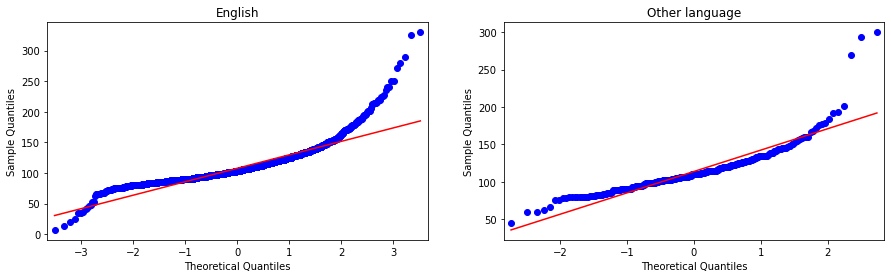

valors observats 2270.9709482210696  201.6611900469274
valors P  0.0  1.6211715522463065e-44
valor P: 0.0002760390004880243   Valor observat: 13.24553913966608


In [28]:
## Llenguatge: english or other.
g1=filtered_df[filtered_df['language'] =='English']['duration']
g2=filtered_df[filtered_df['language'] =='Other-language']['duration']

# normalitat
fig, ax = plt.subplots(1, 2, figsize=(15, 4))
ax[0].set_title('English')
qqplot(g1, line='s', ax = ax[0])
ax[1].set_title('Other language')
qqplot(g2, line='s', ax=ax[1])
plt.show()
x1, p1 = stats.normaltest(g1)
x2, p2 = stats.normaltest(g2)
print("valors observats {0}  {1}".format(x1, x2))
print("valors P  {0}  {1}".format(p1, p2))

# homoscedasticitat
stat, p = stats.levene(g1,g2)
print("valor P: {0}   Valor observat: {1}".format(p, stat))

Tal com veiem als qqplots i al test de normalitat, la variable durada NO es normal ni als films en anglés ni als films no anglesos. Per tant aplicarem un test de U-Mannwhitney per veure si hi ha diferències en la durada entre els films anglesos i no anglesos

In [29]:
# TEST U MANN WITHNEY, compare samples
stat, p = mannwhitneyu(g1, g2)
print("valor P: {0}   Valor observat: {1}".format(p, stat))

valor P: 2.786083015124715e-06   Valor observat: 619520.5


/Users/sgalan/work/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)


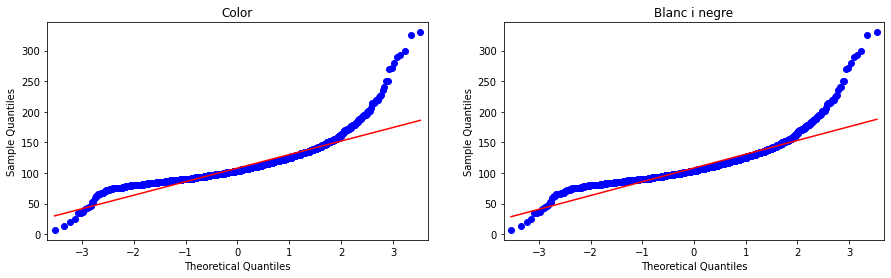

valors observats 2514.6735744238954  2528.578581981032
valors P  0.0  0.0
valor P: 0.39928496147862735   Valor observat: 0.7105417986482412


In [30]:
## Color: 
g1=filtered_df[filtered_df['color'] =='Color']['duration']
g2=filtered_df[filtered_df['Color'] !='Color']['duration']

# normalitat
fig, ax = plt.subplots(1, 2, figsize=(15, 4))
ax[0].set_title('Color')
qqplot(g1, line='s', ax = ax[0])
ax[1].set_title('Blanc i negre')
qqplot(g2, line='s', ax=ax[1])
plt.show()
x1, p1 = stats.normaltest(g1)
x2, p2 = stats.normaltest(g2)
print("valors observats {0}  {1}".format(x1, x2))
print("valors P  {0}  {1}".format(p1, p2))

# homoscedasticitat
stat, p = stats.levene(g1,g2)
print("valor P: {0}   Valor observat: {1}".format(p, stat))

In [31]:
# TEST U MANN WITHNEY, compare samples
stat, p = mannwhitneyu(g1, g2)
print("valor P: {0}   Valor observat: {1}".format(p, stat))

valor P: 0.37511552534957626   Valor observat: 11526756.0


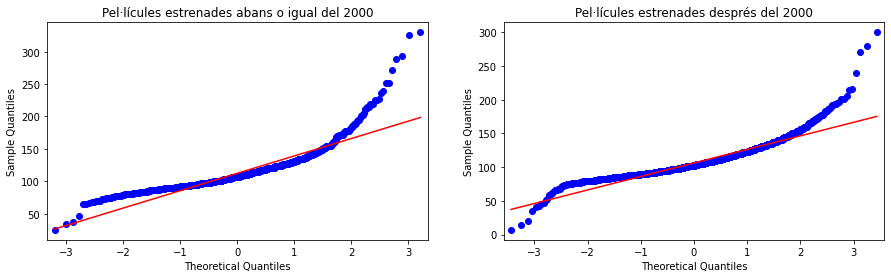

valors observats 841.1573200555254  1368.8051586661857
valors P  2.213139266433237e-183  5.857825028413544e-298
valor P: 2.376808601158625e-12   Valor observat: 49.39712820690029


In [32]:
## Year: 
g1=filtered_df[filtered_df['title_year_bins'] =='<=2000']['duration']
g2=filtered_df[filtered_df['title_year_bins'] =='>2000']['duration']

# normalitat
fig, ax = plt.subplots(1, 2, figsize=(15, 4))
ax[0].set_title('Pel·lícules estrenades abans o igual del 2000')
qqplot(g1, line='s', ax = ax[0])
ax[1].set_title('Pel·lícules estrenades després del 2000')
qqplot(g2, line='s', ax=ax[1])
plt.show()
x1, p1 = stats.normaltest(g1)
x2, p2 = stats.normaltest(g2)
print("valors observats {0}  {1}".format(x1, x2))
print("valors P  {0}  {1}".format(p1, p2))

# homoscedasticitat
stat, p = stats.levene(g1,g2)
print("valor P: {0}   Valor observat: {1}".format(p, stat))

In [33]:
# TEST U MANN WITHNEY, compare samples
stat, p = mannwhitneyu(g1, g2)
print("valor P: {0}   Valor observat: {1}".format(p, stat))

valor P: 5.42449244732365e-15   Valor observat: 2209487.0


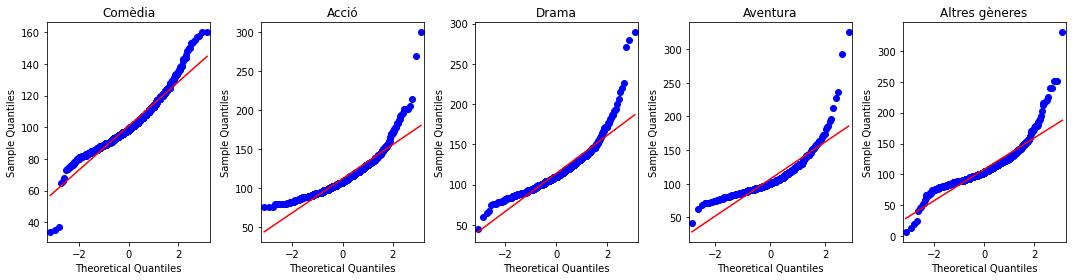

valors observats 180.2811793087847  539.4022715663605  444.75327688186536  312.0575103142032  520.3330480025202
valors P 7.119333171640752e-40  7.417968184635345e-118  2.6488235008905084e-97  1.728114909101352e-68  1.025921781068513e-113
valor P: 6.322712572429304e-31   Valor observat: 37.47926004339351


In [34]:
## main_genre: 
g1=filtered_df[filtered_df['main_genre'] =='Comedy']['duration']
g2=filtered_df[filtered_df['main_genre'] =='Action']['duration']
g3=filtered_df[filtered_df['main_genre'] =='Drama']['duration']
g4=filtered_df[filtered_df['main_genre'] =='Adventure']['duration']
g5=filtered_df[filtered_df['main_genre'] =='Other-gen']['duration']



# normalitat
fig, ax = plt.subplots(1, 5, figsize=(15, 4))
ax[0].set_title('Comèdia')
qqplot(g1, line='s', ax = ax[0])
ax[1].set_title('Acció')
qqplot(g2, line='s', ax=ax[1])
ax[2].set_title('Drama')
qqplot(g3, line='s', ax = ax[2])
ax[3].set_title('Aventura')
qqplot(g4, line='s', ax=ax[3])
ax[4].set_title('Altres gèneres')
qqplot(g5, line='s', ax=ax[4])
plt.tight_layout()
plt.show()
x1, p1 = stats.normaltest(g1)
x2, p2 = stats.normaltest(g2)
x3, p3 = stats.normaltest(g3)
x4, p4 = stats.normaltest(g4)
x5, p5 = stats.normaltest(g5)


print("valors observats {0}  {1}  {2}  {3}  {4}".format(x1, x2, x3, x4, x5))
print("valors P {0}  {1}  {2}  {3}  {4}".format(p1, p2, p3, p4, p5))

# homoscedasticitat
stat, p = stats.levene(g1,g2,g3,g4,g5)
print("valor P: {0}   Valor observat: {1}".format(p, stat))

In [35]:
# TEST KRUSKAL-WALLIS
# compare samples
stat, p =stats.kruskal(g1,g2,g3,g4,g5)
print("valor P: ",p, " Valor observat: ",stat)

valor P:  3.2457922558317035e-64  Valor observat:  302.4267395392465


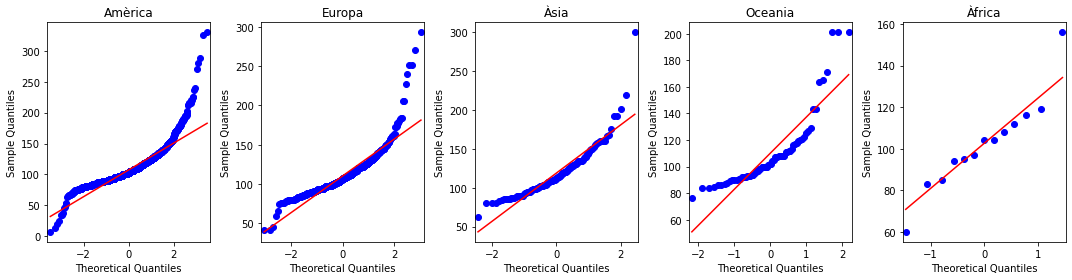

valors observats 1951.276709704945  464.3178715715231  80.22887713759722  38.28170048338434  3.9738499901160846
valors P 0.0  1.4950484384773466e-101  3.788965797070183e-18  4.86669759544416e-09  0.1371164114896701
valor P: 0.00010066602019890973   Valor observat: 5.887473092383536


/Users/sgalan/work/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [36]:
## continent: 
g1=filtered_df[filtered_df['Continent'] =='America']['duration']
g2=filtered_df[filtered_df['Continent'] =='Europe']['duration']
g3=filtered_df[filtered_df['Continent'] =='Asia']['duration']
g4=filtered_df[filtered_df['Continent'] =='Oceania']['duration']
g5=filtered_df[filtered_df['Continent'] =='Africa']['duration']



# normalitat
fig, ax = plt.subplots(1, 5, figsize=(15, 4))
ax[0].set_title('Amèrica')
qqplot(g1, line='s', ax = ax[0])
ax[1].set_title('Europa')
qqplot(g2, line='s', ax=ax[1])
ax[2].set_title('Àsia')
qqplot(g3, line='s', ax = ax[2])
ax[3].set_title('Oceania')
qqplot(g4, line='s', ax=ax[3])
ax[4].set_title('Àfrica')
qqplot(g5, line='s', ax=ax[4])
plt.tight_layout()
plt.show()
x1, p1 = stats.normaltest(g1)
x2, p2 = stats.normaltest(g2)
x3, p3 = stats.normaltest(g3)
x4, p4 = stats.normaltest(g4)
x5, p5 = stats.normaltest(g5)


print("valors observats {0}  {1}  {2}  {3}  {4}".format(x1, x2, x3, x4, x5))
print("valors P {0}  {1}  {2}  {3}  {4}".format(p1, p2, p3, p4, p5))

# homoscedasticitat
stat, p = stats.levene(g1,g2,g3,g4,g5)
print("valor P: {0}   Valor observat: {1}".format(p, stat))

In [37]:
# TEST KRUSKAL-WALLIS
# compare samples
stat, p =stats.kruskal(g1,g2,g3,g4,g5)
print("valor P: {0}   Valor observat: {1}".format(p, stat))

valor P: 2.618329471517488e-07   Valor observat: 36.21107469890679


#### Correlació variables amb la variable de duració <a class="anchor" id="correlació_variables"></a>

In [38]:
filtered_df.columns

Index(['color', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes',
       'actor_2_facebook_likes', 'actor_1_facebook_likes', 'gross',
       'num_voted_users', 'cast_total_facebook_likes', 'num_user_for_reviews',
       'language', 'budget', 'imdb_score', 'aspect_ratio',
       'movie_facebook_likes', 'Continent', 'title_year_bins', 'main_genre',
       'English', 'Other-language', 'Action', 'Adventure', 'Comedy', 'Drama',
       'Other-gen', ' Black and White', 'Color', '<=2000', '>2000', 'Africa',
       'America', 'Asia', 'Europe', 'Oceania', 'Other-continent'],
      dtype='object')

In [39]:
correlation_dict = {}
for i in filtered_df.columns:
    if i in ['num_critic_for_reviews', 'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_facebook_likes', 'actor_1_facebook_likes', 'gross','num_voted_users', 'cast_total_facebook_likes', 'num_user_for_reviews','budget', 'imdb_score', 'aspect_ratio', 'movie_facebook_likes']:
        corr, pval = pearsonr(filtered_df['duration'], filtered_df[i]) 
        correlation_dict[i] = [corr, pval]

In [40]:
orderedDict_corr = dict(sorted(correlation_dict.items(), key=lambda t: t[1][1]))
pd.DataFrame.from_dict(orderedDict_corr, orient='index', columns=['correlation', 'pvalue']).head(10)

,correlation,pvalue
num_user_for_reviews,0.352534,9.677374e-144
num_voted_users,0.342481,2.974620e-135
imdb_score,0.342185,5.229846e-135
num_critic_for_reviews,0.250943,1.965519e-71
gross,0.232756,1.952738e-61
movie_facebook_likes,0.218328,4.280753e-54
director_facebook_likes,0.173426,1.770237e-34
actor_2_facebook_likes,0.137036,4.996309e-22
actor_3_facebook_likes,0.132285,1.268529e-20
cast_total_facebook_likes,0.126943,4.196485e-19


#### Regressió lineal <a class="anchor" id="regressió_lineal"></a>

In [41]:
X = filtered_df[['num_critic_for_reviews',
       'director_facebook_likes', 'actor_3_facebook_likes',
       'actor_2_facebook_likes', 'actor_1_facebook_likes', 'gross',
       'num_voted_users', 'cast_total_facebook_likes', 'num_user_for_reviews',
       'budget', 'imdb_score', 'aspect_ratio',
       'movie_facebook_likes', 'English', 'Action',
       'Adventure', 'Comedy', 'Drama', '>2000', 'Africa', 'America', 'Asia','Oceania']]

y = filtered_df['duration']

# Fit and make the predictions by the model
model = sm.OLS(y, X).fit()
predictions = model.predict(X)


# Print out the statistics
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               duration   R-squared (uncentered):                   0.964
Model:                            OLS   Adj. R-squared (uncentered):              0.963
Method:                 Least Squares   F-statistic:                              5627.
Date:                Tue, 05 Jan 2021   Prob (F-statistic):                        0.00
Time:                        09:29:01   Log-Likelihood:                         -21949.
No. Observations:                4913   AIC:                                  4.394e+04
Df Residuals:                    4890   BIC:                                  4.409e+04
Df Model:                          23                                                  
Covariance Type:            nonrobust                                                  
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
num_critic_for_reviews       -0.0130      0.004     -2.981      0.003      -0.022      -0.004
director_facebook_likes       0.0005      0.000      4.347      0.000       0.000       0.001
actor_3_facebook_likes       -0.0018      0.000     -3.703      0.000      -0.003      -0.001
actor_2_facebook_likes       -0.0015      0.000     -4.964      0.000      -0.002      -0.001
actor_1_facebook_likes       -0.0016      0.000     -5.538      0.000      -0.002      -0.001
gross                      1.982e-08   6.61e-09      2.997      0.003    6.85e-09    3.28e-08
num_voted_users           -2.961e-05   4.32e-06     -6.853      0.000   -3.81e-05   -2.11e-05
cast_total_facebook_likes     0.0016      0.000      5.576      0.000       0.001       0.002
num_user_for_reviews          0.0163      0.001     11.571      0.000       0.014       0.019
budget                     4.076e-09   1.56e-09      2.617      0.009    1.02e-09    7.13e-09
imdb_score                   11.1567      0.200     55.664      0.000      10.764      11.550
aspect_ratio                  4.5023      0.382     11.798      0.000       3.754       5.250
movie_facebook_likes       5.788e-05   2.26e-05      2.566      0.010    1.37e-05       0.000
English                      18.1815      1.287     14.125      0.000      15.658      20.705
Action                        8.3247      0.904      9.211      0.000       6.553      10.097
Adventure                     2.5724      1.196      2.151      0.032       0.227       4.917
Comedy                        1.6322      0.860      1.898      0.058      -0.054       3.318
Drama                         8.4080      0.940      8.944      0.000       6.565      10.251
>2000                        -0.0911      0.709     -0.128      0.898      -1.481       1.299
Africa                       -3.2851      5.926     -0.554      0.579     -14.903       8.333
America                       1.2892      0.857      1.505      0.132      -0.390       2.968
Asia                         22.4868      2.105     10.681      0.000      18.360      26.614
Oceania                      -0.9100      2.686     -0.339      0.735      -6.177       4.357
==============================================================================
Omnibus:                     2042.000   Durbin-Watson:                   1.830
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            29901.241
Skew:                           1.585   Prob(JB):                         0.00
Kurtosis:                      14.663   Cond. No.                     3.99e+09
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since th